<a href="https://colab.research.google.com/github/Innanov/Xanadu-Codebook-Solutions/blob/main/Xanadu_Introduction_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Xanadu Codebook Solutions (Introduction) [1-8]

## I.1 All about qubits

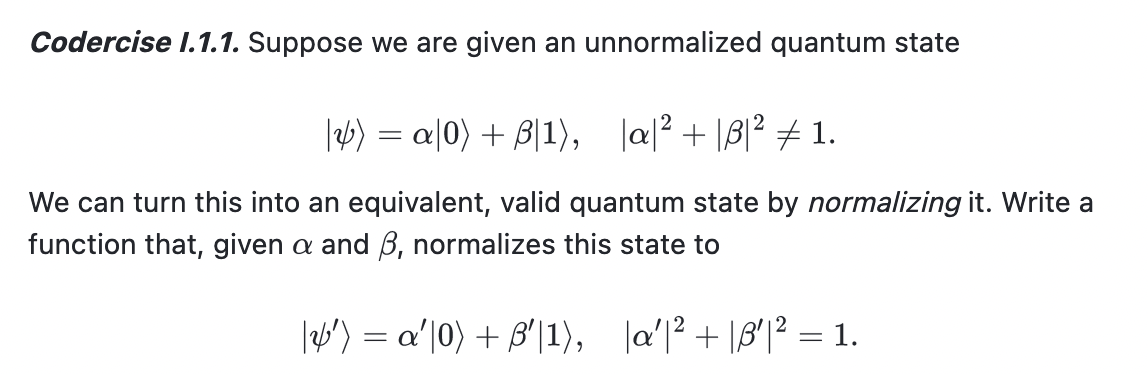

In [ ]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    """Compute a normalized quantum state given arbitrary amplitudes.
    
    Args:
        alpha (complex): The amplitude associated with the |0> state.
        beta (complex): The amplitude associated with the |1> state.
        
    Returns:
        array[complex]: A vector (numpy array) with 2 elements that represents
        a normalized quantum state.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A VECTOR [a', b'] BASED ON alpha AND beta SUCH THAT |a'|^2 + |b'|^2 = 1
    norm = np.sqrt(alpha*np.conj(alpha) + beta*np.conj(beta))
    return np.array([alpha/norm, beta/norm])
    # RETURN A VECTOR
    pass 


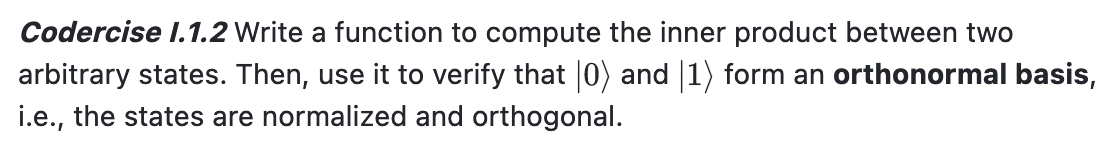

In [ ]:
def inner_product(state_1, state_2):
    """Compute the inner product between two states.
    
    Args:
        state_1 (array[complex]): A normalized quantum state vector
        state_2 (array[complex]): A second normalized quantum state vector
        
    Returns:
        complex: The value of the inner product <state_1 | state_2>.
    """
 
    ##################
    # YOUR CODE HERE #
    ##################

    # COMPUTE AND RETURN THE INNER PRODUCT

    return  np.dot(np.conj(state_1).T, state_2)


# Test your results with this code
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")


<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


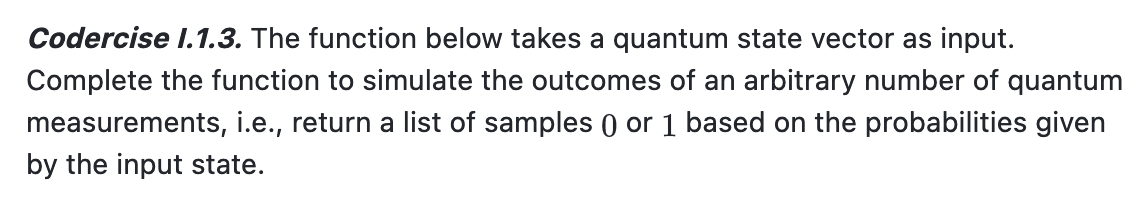

In [ ]:
def measure_state(state, num_meas):
    """Simulate a quantum measurement process.

    Args:
        state (array[complex]): A normalized qubit state vector. 
        num_meas (int): The number of measurements to take
        
    Returns:
        array[int]: A set of num_meas samples, 0 or 1, chosen according to the probability 
        distribution defined by the input state.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
    # COMPUTE THE MEASUREMENT OUTCOME PROBABILITIES
    
    # RETURN A LIST OF SAMPLE MEASUREMENT OUTCOMES
    return np.random.choice(2, num_meas, p=[np.abs(state[0])**2,np.abs(state[1])**2])
    pass

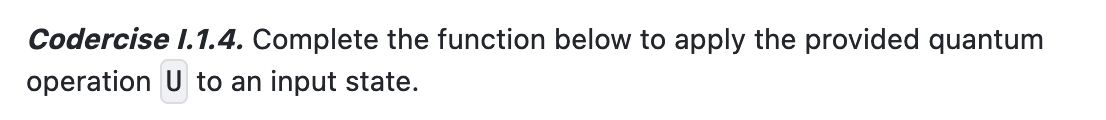

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    """Apply a quantum operation.

    Args:
        state (array[complex]): A normalized quantum state vector. 
        
    Returns:
        array[complex]: The output state after applying U.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY U TO THE INPUT STATE AND RETURN THE NEW STATE
    return np.dot(U, state)
    pass


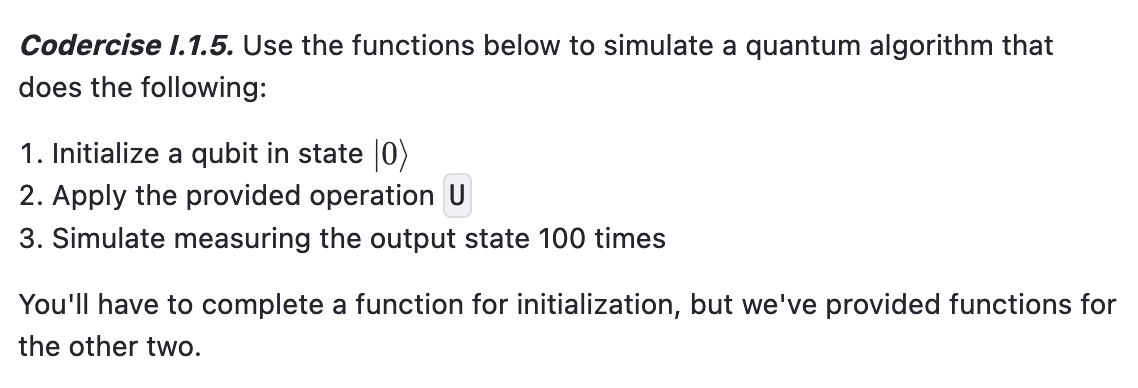

In [ ]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def initialize_state():
    """Prepare a qubit in state |0>.
    
    Returns:
        array[float]: the vector representation of state |0>.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE THE STATE |0> 
    return np.array([1, 0])
    pass


def apply_u(state):
    """Apply a quantum operation."""
    return np.dot(U, state)


def measure_state(state, num_meas):
    """Measure a quantum state num_meas times."""
    p_alpha = np.abs(state[0]) ** 2
    p_beta = np.abs(state[1]) ** 2
    meas_outcome = np.random.choice([0, 1], p=[p_alpha, p_beta], size=num_meas)
    return meas_outcome


def quantum_algorithm():
    """Use the functions above to implement the quantum algorithm described above.
    
    Try and do so using three lines of code or less!
    
    Returns:
        array[int]: the measurement results after running the algorithm 100 times
    """

    ##################
    # YOUR CODE HERE #
    ##################
    state = initialize_state()
    return measure_state(apply_u(state), 100)
    # PREPARE THE STATE, APPLY U, THEN TAKE 100 MEASUREMENT SAMPLES
    pass


## I.2 Quantum circuits

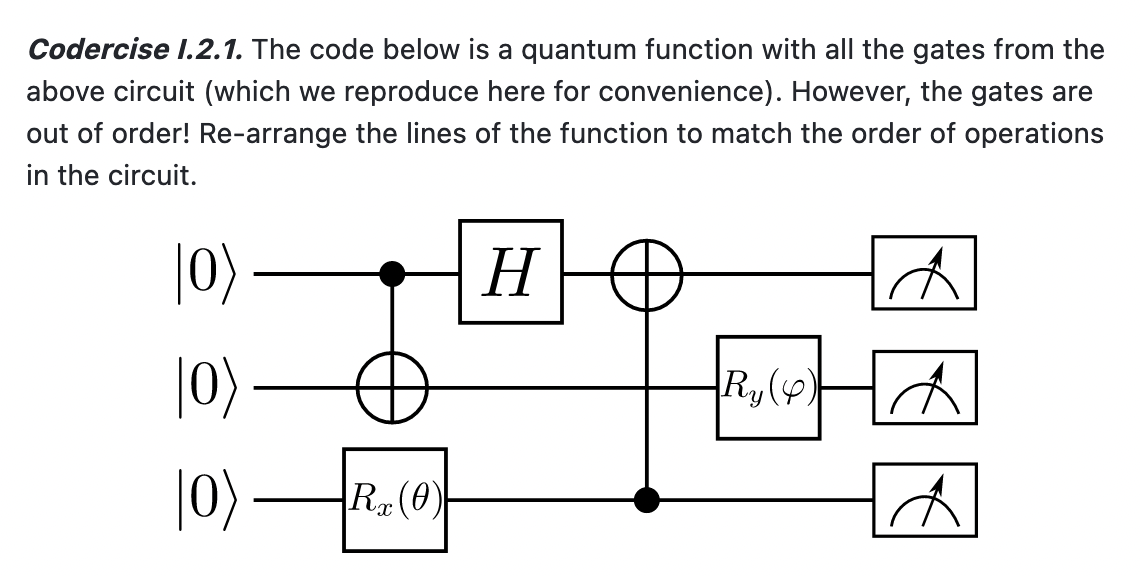

In [ ]:
def my_circuit(theta, phi): 
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)
    
    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

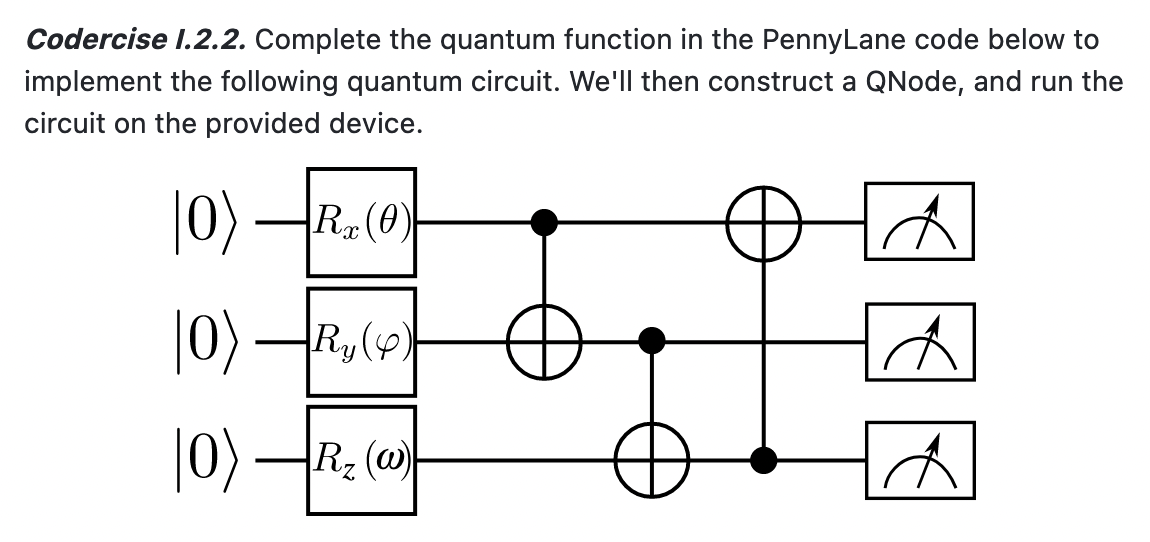

In [ ]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)


tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

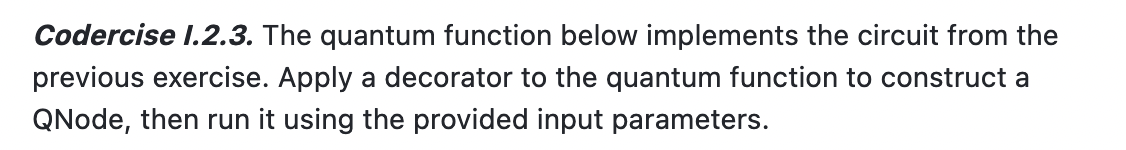

In [ ]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

##################
# YOUR CODE HERE #
##################

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

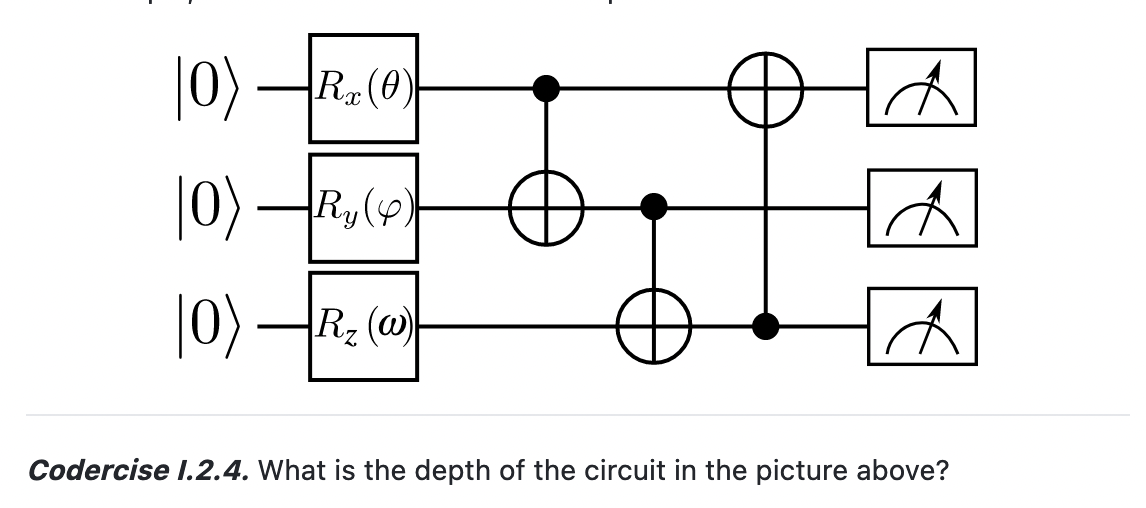

In [ ]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


##################
# YOUR CODE HERE #
##################
resource_calculator = qml.specs(my_circuit)

# we pass it the same parameters as the original QNode
theta, phi, omega = 0.1, 0.2, 0.3
print(resource_calculator(theta, phi, omega))

# FILL IN THE CORRECT CIRCUIT DEPTH
depth = resource_calculator(theta, phi, omega)['depth']


{'gate_sizes': defaultdict(<class 'int'>, {1: 3, 2: 3}), 'gate_types': defaultdict(<class 'int'>, {'RX': 1, 'RY': 1, 'RZ': 1, 'CNOT': 3}), 'num_operations': 6, 'num_observables': 1, 'num_diagonalizing_gates': 0, 'num_used_wires': 3, 'depth': 4, 'num_trainable_params': 0, 'num_device_wires': 3, 'device_name': 'default.qubit.autograd', 'expansion_strategy': 'gradient', 'gradient_options': {}, 'interface': 'autograd', 'diff_method': 'best', 'gradient_fn': 'backprop'}


## I.3 Unitary matrices

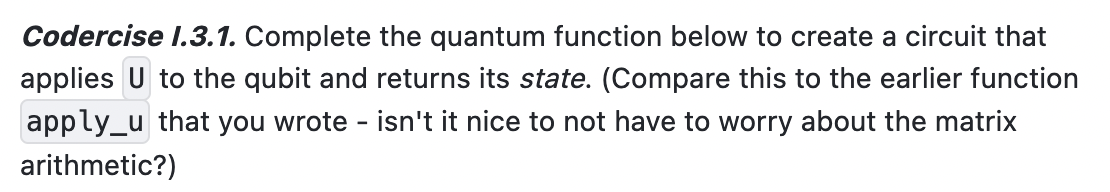

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    qml.QubitUnitary(U, wires=0)


    # Return the state
    return qml.state()


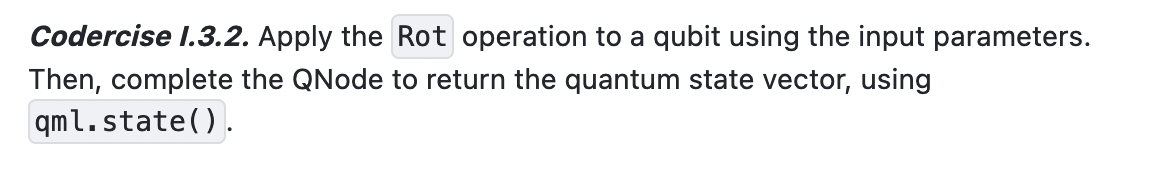

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################
    
    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    qml.Rot(phi, theta, omega, wires=0)
    # RETURN THE QUANTUM STATE VECTOR

    return qml.state()


## I.4 X and H

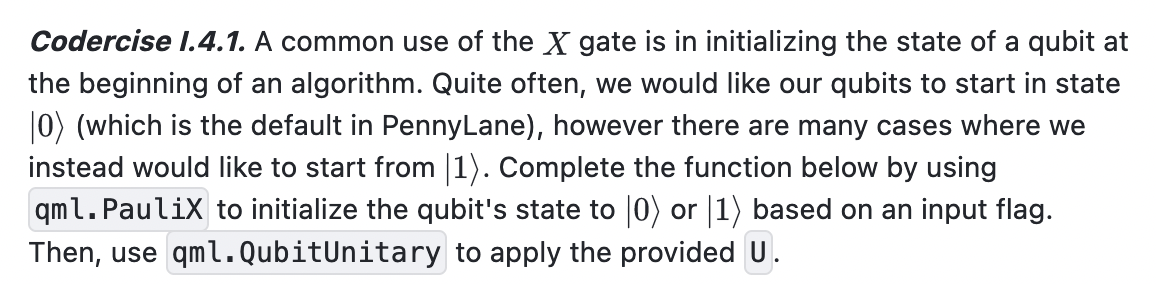

In [ ]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.
  
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if (state > 0):
        qml.PauliX(wires=0)
    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)


    return qml.state()


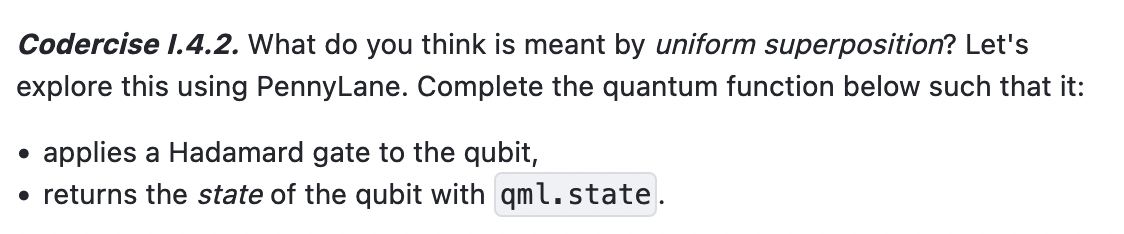

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)
    # RETURN THE STATE
    return qml.state()

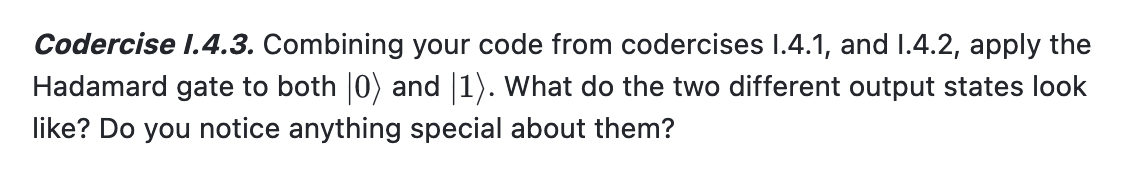

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if (state > 0):
        qml.PauliX(wires=0)
    # APPLY THE HADAMARD
    qml.Hadamard(wires=0)
    # RETURN THE STATE

    return qml.state()

print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


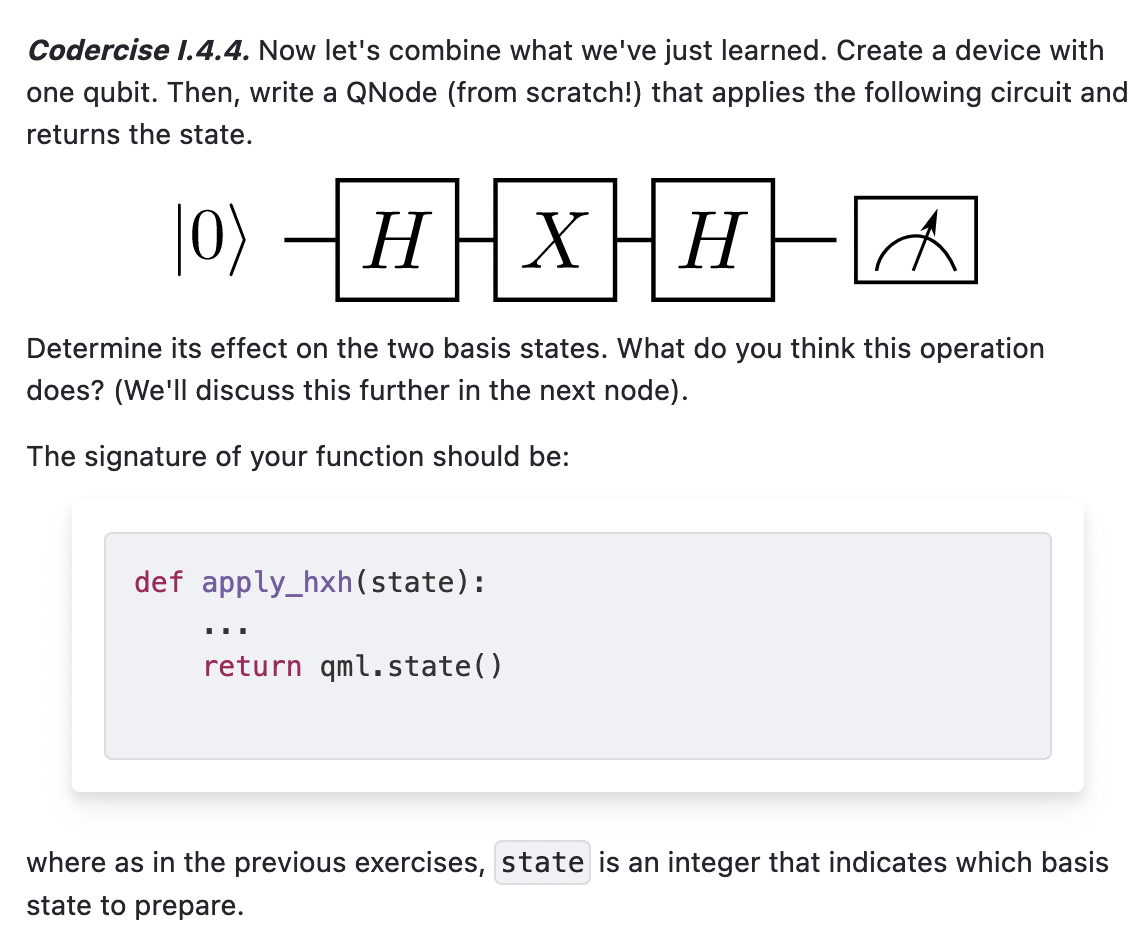

In [ ]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)


# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if (state > 0):
        qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()
    
# Print your results
print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


## I.5 It's just a phase

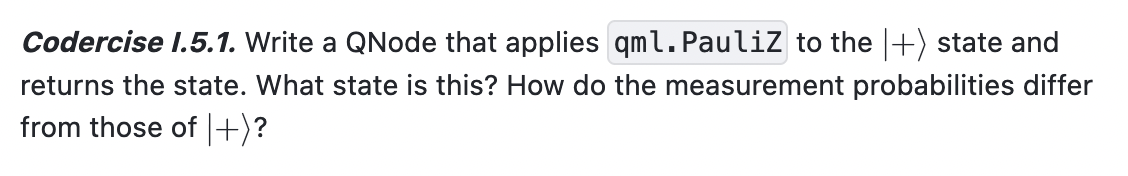

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY PAULI Z
    qml.PauliZ(wires=0)
    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


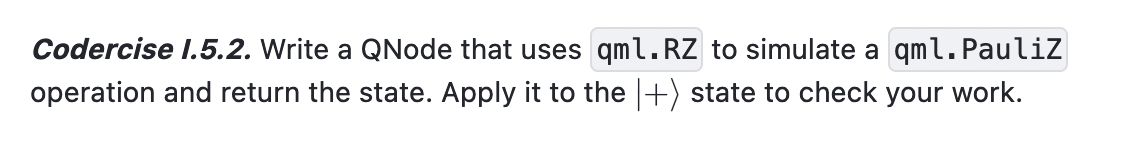

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)
    # APPLY RZ
    qml.RZ(np.pi, wires=0)
    # RETURN THE STATE
    return qml.state()


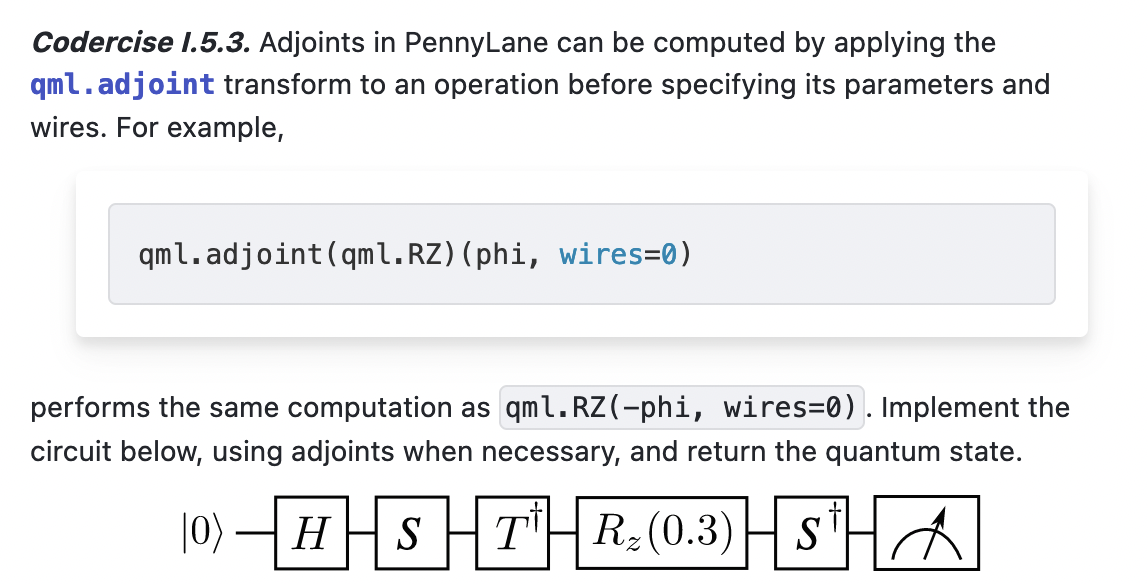

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.adjoint(qml.T(wires=0))
    qml.RZ(0.3, wires=0)
    qml.adjoint(qml.S(wires=0))

    # RETURN THE STATE

    return qml.state()


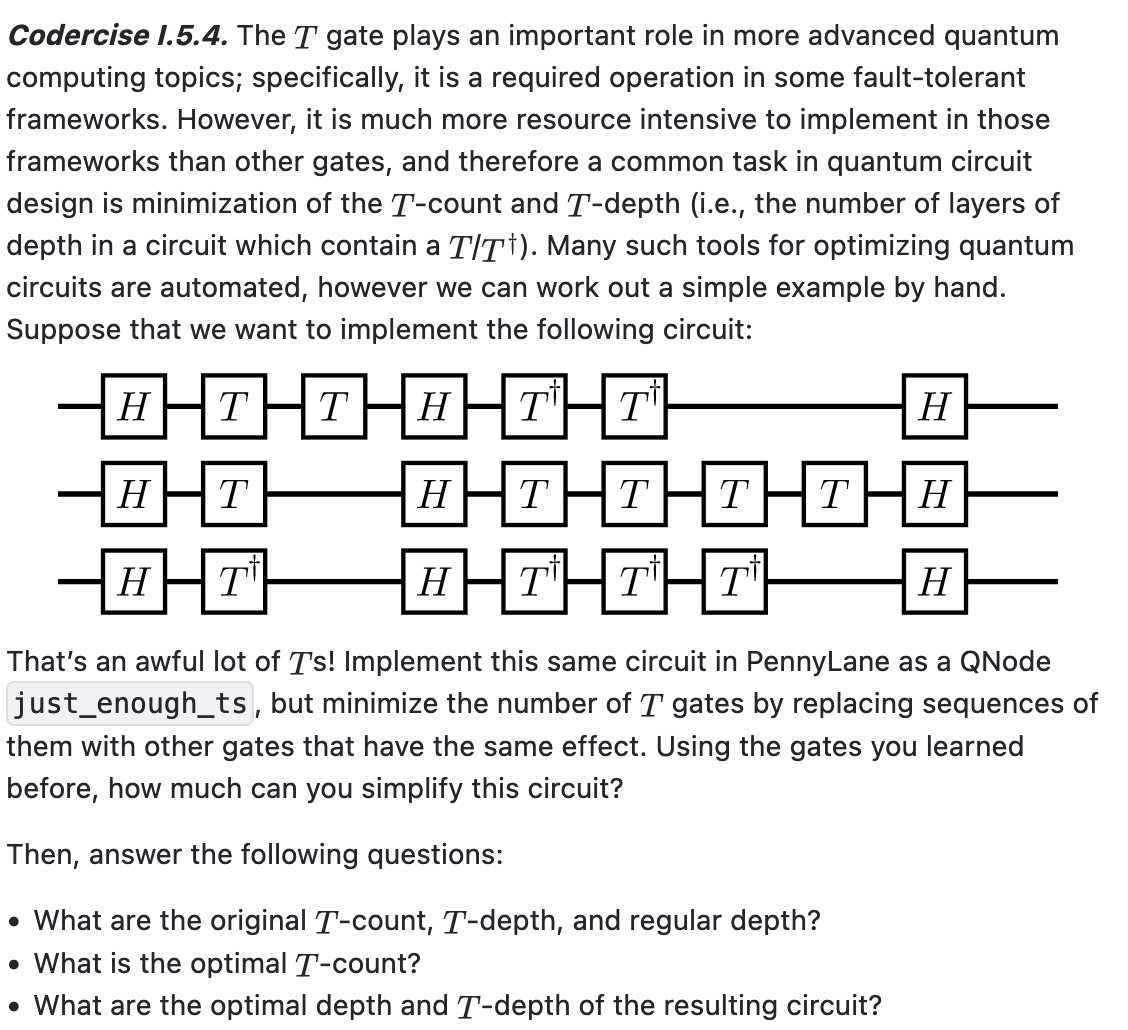

In [ ]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def too_many_ts():
    """You can implement the original circuit here as well, it may help you with
    testing to ensure that the circuits have the same effect.

    Returns:
        array[float]: The measurement outcome probabilities.
    """
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.adjoint(qml.T(wires=0))
    qml.adjoint(qml.T(wires=0))
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.T(wires=2))
    qml.Hadamard(wires=2)
    qml.adjoint(qml.T(wires=2))
    qml.adjoint(qml.T(wires=2))
    qml.adjoint(qml.T(wires=2))
    qml.Hadamard(wires=2)
    return qml.probs(wires=[0, 1, 2])

@qml.qnode(dev)
def just_enough_ts():
    """Implement an equivalent circuit as the above with the minimum number of 
    T and T^\dagger gates required.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT, BUT COMBINE AND OPTIMIZE THE GATES
    # TO MINIMIZE THE NUMBER OF TS
    qml.Hadamard(wires=0)
    qml.S(wires=0)
    qml.Hadamard(wires=0)
    qml.adjoint(qml.S(wires=0))
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.T(wires=1)
    qml.Hadamard(wires=1)
    qml.PauliZ(wires=1)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.adjoint(qml.T(wires=2))
    qml.Hadamard(wires=2)
    qml.adjoint(qml.T(wires=2))
    qml.adjoint(qml.S(wires=2))
    qml.Hadamard(wires=2)
    return qml.probs(wires=[0, 1, 2])

##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT VALUES FOR THE ORIGINAL CIRCUIT
original_depth = 8
original_t_count = 13
original_t_depth = 6

# FILL IN THE CORRECT VALUES FOR THE NEW, OPTIMIZED CIRCUIT
optimal_depth = 6
optimal_t_count = 3
optimal_t_depth = 2


## I.6 From a different angle

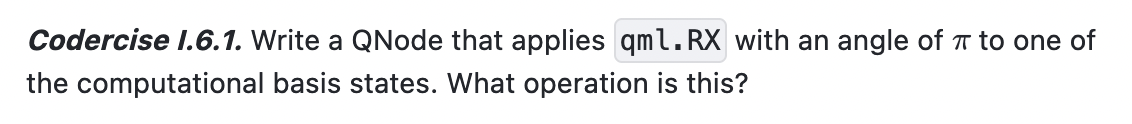

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.
    
    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires=0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))


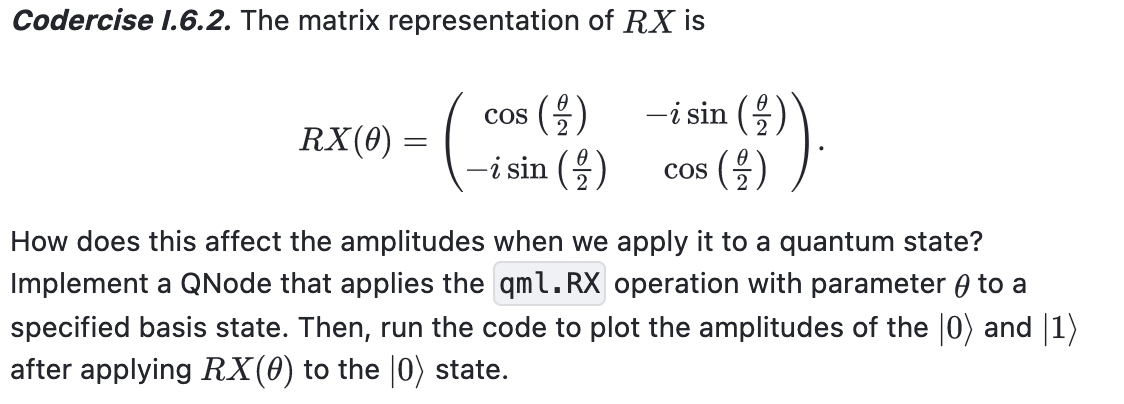

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta, wires=0)

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)


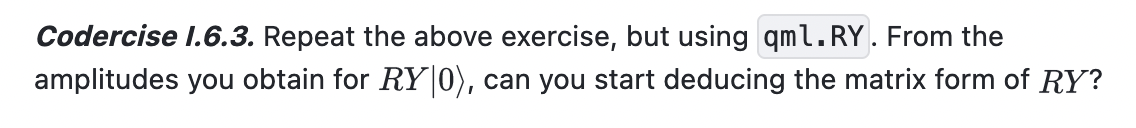

In [ ]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires=0)
    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)


## I.7 Universal gate sets

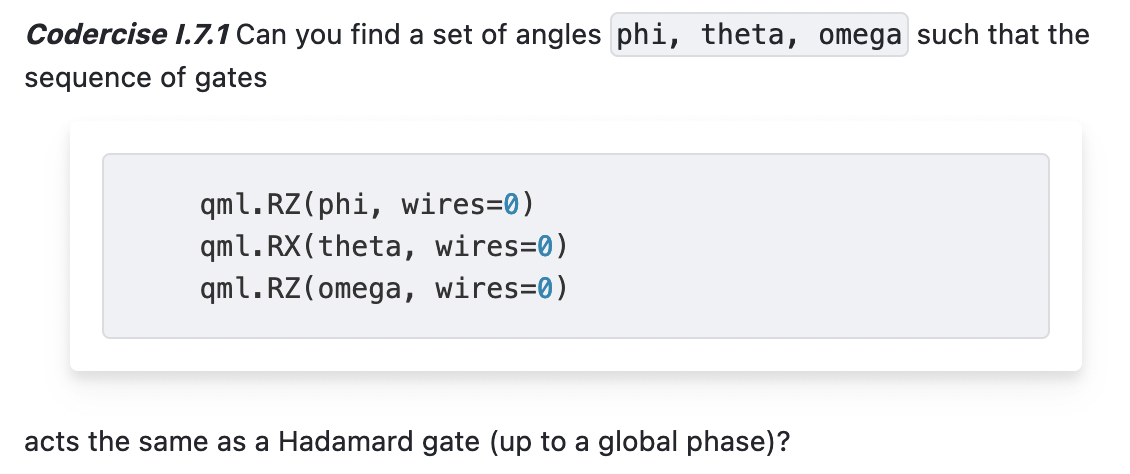

In [ ]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2

@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()


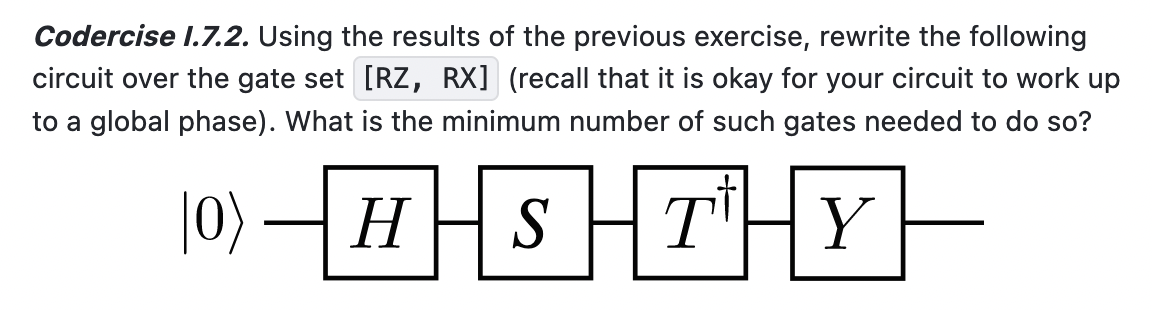

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    # Hadamard
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    # S
    qml.RZ(np.pi/2, wires=0)
    # T dagger
    qml.RZ(-np.pi/4, wires=0)
    # Y
    qml.RZ(np.pi, wires=0)
    qml.RX(np.pi, wires=0)

    return qml.state()


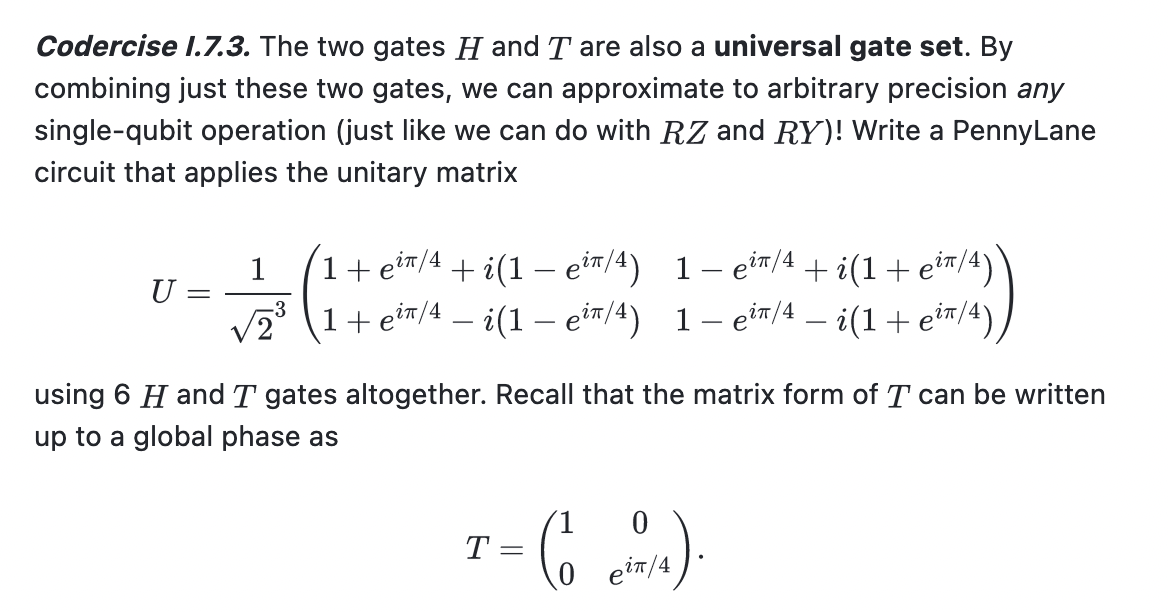

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    #Matrix 1: HTH
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    
    
    #Matrix 1: HTT
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    return qml.state()


## I.8 Prepare yourself

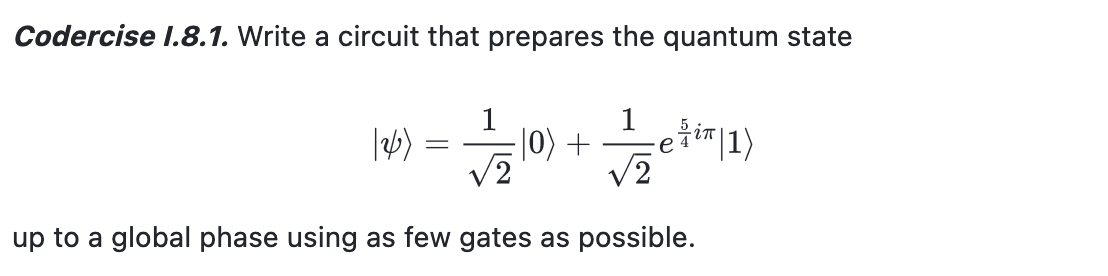

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(wires=0)
    for i in range(5):
        qml.T(wires=0)
    return qml.state()


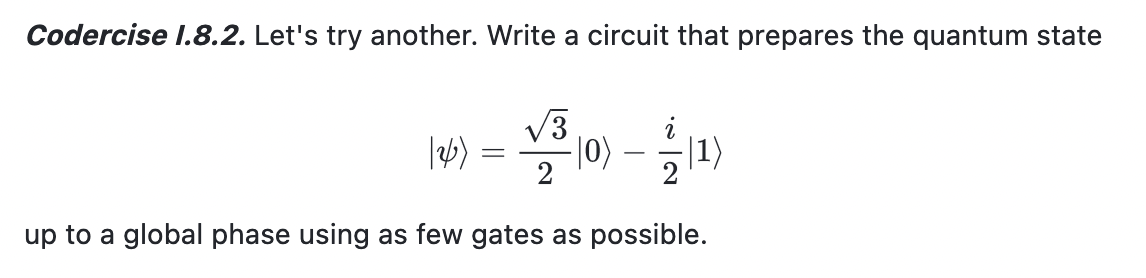

In [ ]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, wires=0)
    return qml.state()


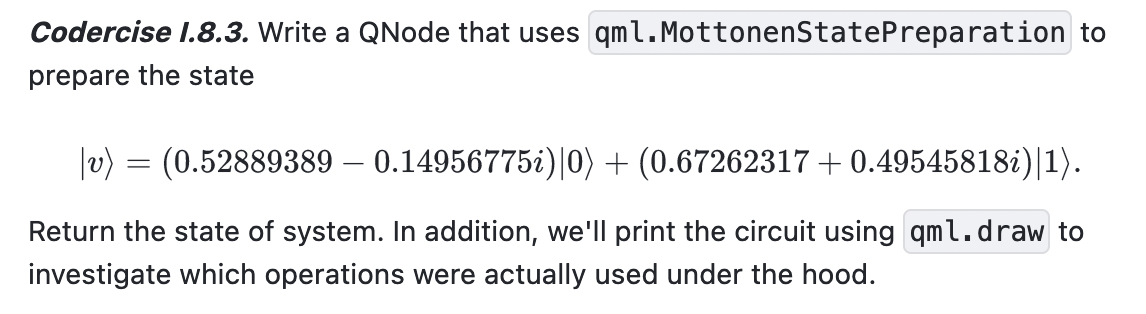

In [ ]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(state, wires=0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state, expansion_strategy='device')(v))
